# Part4: Machine Learning - Data Processing
<span style="color:red;">**Note: Since the work is divided into scraping and subsequent manual processing, the project code is split into five files. This is the fourth code file.**</span>

## Since this section is relatively simple, it only constructs the Y variable for the machine learning part and conducts some basic data processing. Therefore, detailed comments are not provided.

In [1]:
import pandas as pd

industry_data_path = '中间数据/行业数据.xlsx'
supply_chain_data_path = '中间数据/供应链韧性数据.xlsx'

industry_data = pd.read_excel(industry_data_path)
supply_chain_data = pd.read_excel(supply_chain_data_path)

#industry_data.head(), supply_chain_data.head()

In [2]:
# 定义要筛选的行业列表
selected_industries = ['工业', '材料', '信息技术', '可选消费']

# 筛选出属于这四大行业的数据
filtered_industry_data = industry_data[industry_data['所属Wind行业名称\n[行业级别]一级行业'].isin(selected_industries)]
# 筛选出属于这四大行业的供应链韧性数据
filtered_supply_chain_data = supply_chain_data[supply_chain_data['所属一级行业'].isin(selected_industries)]

# 显示筛选后的数据
filtered_supply_chain_data.head(), filtered_industry_data.head()

(    id  year  pm      流动比率     资产负债率        Q值  两职合一  上游企业数字化程度  \
 7    4  2013   1  0.811877  0.534334  1.254200     0   0.000000   
 8    4  2012   1  0.807468  0.619304  1.203142     0   0.000002   
 9    5  2015   0  0.942235  0.681256  2.366791     1   0.187198   
 10   5  2016   0  0.938173  0.770794  1.996240     1   0.024830   
 13   7  2012   1  0.864309  0.665814  1.309076     0   0.080491   
 
     在 t-1 年的数字化转型程度         规模    研发投入强度     董事会规模    资金占用情况  上游企业库存调整幅度  \
 7          0.007959  22.077360  0.000000  2.197225 -1.241733   19.110195   
 8          0.008383  22.097160  0.000000  2.197225 -1.241733   19.176721   
 9          0.001067  22.113916  0.033200  2.197225 -0.878218   18.940270   
 10         0.001454  22.800978  0.029831  2.197225 -0.878218   18.920069   
 13         0.000972  20.921334  0.000000  2.197225 -0.878218   18.113855   
 
      公司名称 所属一级行业  
 7    国华网安   信息技术  
 8    国华网安   信息技术  
 9    唐城文化   可选消费  
 10   唐城文化   可选消费  
 13  *ST全新   可选消费  ,
     

In [3]:
# 计算每个行业每年的资金占用情况和上游企业库存调整幅度的平均值
industry_averages = filtered_supply_chain_data.groupby(['所属一级行业', 'year'])[['资金占用情况', '上游企业库存调整幅度']].mean().reset_index()

# 合并供应链数据与行业平均值
merged_data = pd.merge(filtered_supply_chain_data, industry_averages, on=['所属一级行业', 'year'], suffixes=('', '_avg'))

# 计算差异并标记成功或不成功
merged_data['资金占用差异'] = merged_data['资金占用情况'] - merged_data['资金占用情况_avg']
merged_data['库存调整差异'] = merged_data['上游企业库存调整幅度'] - merged_data['上游企业库存调整幅度_avg']
merged_data['成功'] = (merged_data['资金占用差异'] + merged_data['库存调整差异']) < 0

# 查看结果
print(merged_data[['公司名称', 'year', '所属一级行业', '资金占用差异', '库存调整差异', '成功']])

       公司名称  year 所属一级行业    资金占用差异    库存调整差异     成功
0      国华网安  2013   信息技术 -0.114899  1.505167  False
1      国华网安  2012   信息技术 -0.126694  1.329500  False
2      唐城文化  2015   可选消费  0.152887  1.450382  False
3      唐城文化  2016   可选消费  0.074259  0.841610  False
4     *ST全新  2012   可选消费  0.153939  0.853230  False
...     ...   ...    ...       ...       ...    ...
1503   潍柴重机  2019     工业  0.193487 -1.269731   True
1504   潍柴重机  2020     工业  0.140019 -1.472550   True
1505   潍柴重机  2020     工业  0.140019 -1.472550   True
1506   潍柴重机  2020     工业  0.140019 -1.472550   True
1507   中广核技  2019     工业  0.193487       NaN  False

[1508 rows x 6 columns]


In [4]:
# 计算标记为True的企业个数
success_count = merged_data[merged_data['成功']].shape[0]
print("成功的企业个数:", success_count)

# 保存结果到Excel文件
merged_data.to_excel('供应链金融成功分析结果.xlsx', index=False)

成功的企业个数: 686


/var/folders/_r/9qn7rq_s5cgfvkcfk_nwn8_c0000gn/T/ipykernel_18032/1757822639.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_counts.index, y=success_counts.values, palette="viridis")


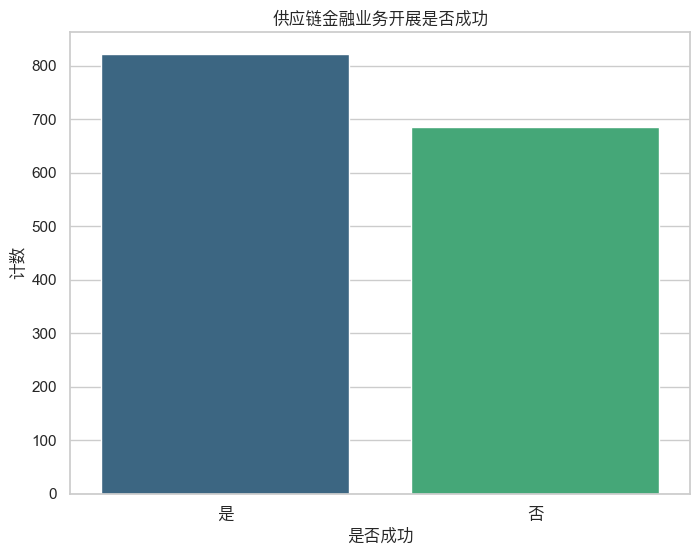

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 读取Excel文件
file_path = '供应链金融成功分析结果.xlsx'
data = pd.read_excel(file_path)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 使用PingFang HK字体支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 确保中文字体正确加载
font = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')

# 统计“成功”列中True和False的数量
success_counts = data["成功"].value_counts()

# 创建柱状图来可视化成功率
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=success_counts.index, y=success_counts.values, palette="viridis")
plt.title("供应链金融业务开展是否成功", fontproperties=font)
plt.xlabel("是否成功", fontproperties=font)
plt.ylabel("计数", fontproperties=font)
plt.xticks(ticks=[0, 1], labels=['是', '否'], fontproperties=font)

# 保存图表
plt.savefig('供应链金融业务开展是否成功.png', dpi=600)

# 显示图表
plt.show()
